<a href="https://colab.research.google.com/github/sophie-myk/AIFFEL_quest_cr/blob/main/Python/Movie_review4th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMDB 데이터셋 로드하기IMDB 데이터셋 로드하기
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_labels[0]

1

In [ ]:
#4-3 정수 시퀀스를 멀티-핫 인코딩으로 인코딩하기
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    for j in sequence:
      results[i,j] = 1.
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [ ]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [ ]:
#4-4 모델 정의하기
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [10]:
#4-5 모델 컴파일하기
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [17]:
#4-6 검증 세트 준비하기
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [18]:
#4-7 모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.6555 - loss: 0.6347 - val_accuracy: 0.8611 - val_loss: 0.4341
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.8861 - loss: 0.3762 - val_accuracy: 0.8830 - val_loss: 0.3252
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9147 - loss: 0.2649 - val_accuracy: 0.8751 - val_loss: 0.3151
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9315 - loss: 0.2071 - val_accuracy: 0.8881 - val_loss: 0.2787
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9451 - loss: 0.1693 - val_accuracy: 0.8899 - val_loss: 0.2833
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9572 - loss: 0.1397 - val_accuracy: 0.8751 - val_loss: 0.3275
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.9661 - loss: 0.1196 - val_accuracy: 0.8836 - val_loss: 0.2941
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9703 - loss: 0.1034 - val_accuracy: 0.8844 - v

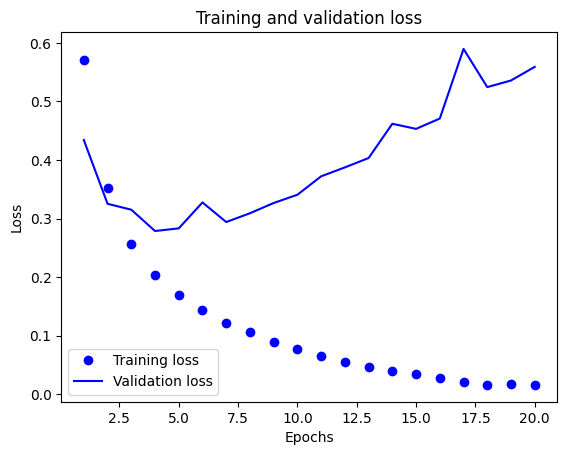

In [23]:
#4-8 훈련과 검증 손실 그리기
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values)+1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values,"b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

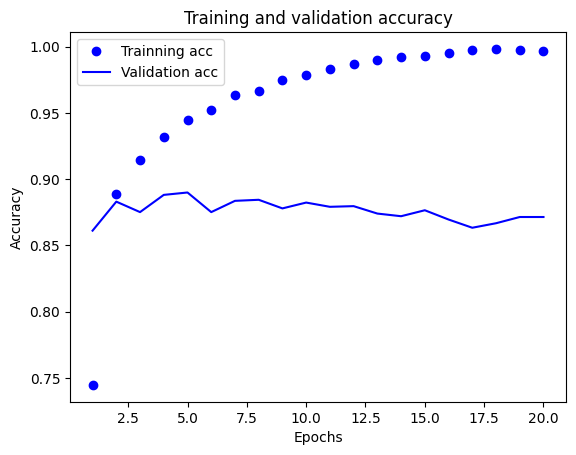

In [27]:
#4-9 훈련과 검증 정확도 그리기
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Trainning acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [29]:
#4-10 모델을 처음부터 다시 훈련하기
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7540 - loss: 0.5422
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.9042 - loss: 0.2791
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.9267 - loss: 0.2075
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9368 - loss: 0.1806
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8819 - loss: 0.2902


In [30]:
results

[0.28870198130607605, 0.884440004825592]

In [31]:
#훈련된 모델로 새로운 데이터에 대해 예측하기
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


array([[0.15592022],
       [0.9990272 ],
       [0.83172435],
       ...,
       [0.09524877],
       [0.05020525],
       [0.44204935]], dtype=float32)

In [33]:
#뉴스 기사 분류: 다중분류문제
#4-11 로이터 데이터셋 로드하기

from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [36]:
#4-12 로이터 데이터셋을 텍스트로 디코딩하기
word_index = reuters.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join(
    [reverse_word_index.get(i - 3,"?") for i in train_data[0]]) #0,1,2는 "패딩","문서시작","사전에 없음"을 위해 예약되어 있으므로 인덱스에서 3을 뺌

In [37]:
train_labels[10]

3

In [41]:
#4-13 데이터 인코딩하기
x_train = vectorize_sequences(train_data) #훈련데이터 벡터 변환
x_test = vectorize_sequences(test_data) #테스트데이터 벡터 변환

In [43]:
#4-14 레이블 인코딩하기
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
      results[i, label] = 1.
  return results
y_train = to_one_hot(train_labels)  #훈련레이블 벡터 변환
y_test = to_one_hot(test_labels)    #테스트레이블 벡터 변환

In [44]:
#4-15 모델 정의하기
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

In [45]:
#4-16 모델 컴파일하기
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

In [46]:
#4-17 검증 세트 준비하기
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]


In [48]:
#4-18 모델 훈련하기
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step - accuracy: 0.3420 - loss: 3.2807 - val_accuracy: 0.5960 - val_loss: 1.9154
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.6486 - loss: 1.7137 - val_accuracy: 0.6880 - val_loss: 1.4074
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7204 - loss: 1.2789 - val_accuracy: 0.7300 - val_loss: 1.2020
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.7828 - loss: 0.9884 - val_accuracy: 0.7620 - val_loss: 1.0767
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8128 - loss: 0.8298 - val_accuracy: 0.7810 - val_loss: 1.0042
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.8485 - loss: 0.7028 - val_accuracy: 0.7860 - val_loss: 0.9664
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.8810 - loss: 0.5730 - val_accuracy: 0.7980 - val_loss: 0.9191
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.8993 - loss: 0.4805 - val_accuracy: 0.8070 - v

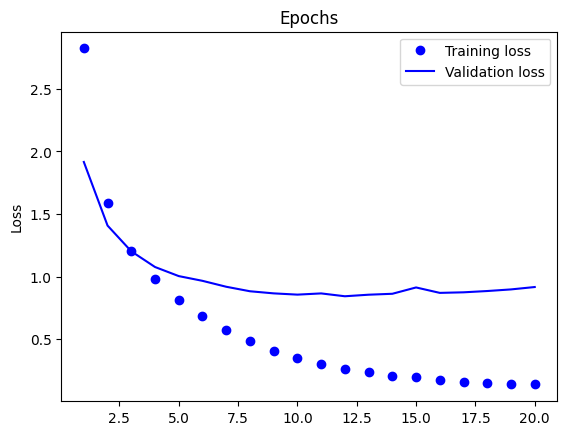

In [49]:
#4-19 훈련과 검증 손실 그리기
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1,len(loss) + 1)
plt.plot(epochs, loss,"bo", label="Training loss")
plt.plot(epochs, val_loss,"b", label="Validation loss")
plt.title("Training and validation loss")
plt.title("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

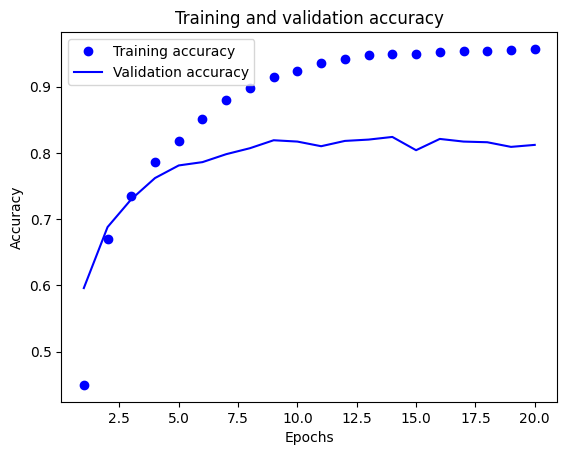

In [51]:
#4-20 훈련과 검증 정확도 그리기
plt.clf() #그래프를 초기화
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [52]:
#4-21 모델을 처음부터 다시 훈련하기
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.4269 - loss: 2.9732
Epoch 2/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.6840 - loss: 1.4756
Epoch 3/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - accuracy: 0.7586 - loss: 1.0949
Epoch 4/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.8057 - loss: 0.8844
Epoch 5/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 75ms/step - accuracy: 0.8404 - loss: 0.7224
Epoch 6/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.8680 - loss: 0.5979
Epoch 7/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - accuracy: 0.8917 - loss: 0.5079
Epoch 8/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.9185 - loss: 0.3878
Epoch 9/9
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.9271 - loss: 0.3525
71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7922 - loss: 0.9334


In [53]:
results

[0.957472562789917, 0.784060537815094]

In [55]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.19278717720391808

In [57]:
predictions = model.predict(x_test)
predictions[0].shape

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(46,)

In [58]:
np.sum(prediction[0])

1.0000001

In [59]:
np.argmax(predictions[0])

3

In [64]:
#4-22 정보 병목이 있는 모델
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4,activation="relu"),
    layers.Dense(46,activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.0691 - loss: 3.4099 - val_accuracy: 0.5970 - val_loss: 2.2482
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.6227 - loss: 1.9078 - val_accuracy: 0.6310 - val_loss: 1.5322
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.6506 - loss: 1.3563 - val_accuracy: 0.6330 - val_loss: 1.4111
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6702 - loss: 1.2032 - val_accuracy: 0.6710 - val_loss: 1.3198
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7298 - loss: 1.0710 - val_accuracy: 0.6830 - val_loss: 1.2774
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7436 - loss: 1.0334 - val_accuracy: 0.7050 - val_loss: 1.2489
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7666 - loss: 0.9118 - val_accuracy: 0.7100 - val_loss: 1.2309
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7831 - loss: 0.8257 - val_accuracy: 0.7170 - v

In [65]:
#4-23 보스턴 주택 데이터셋 로드하기
from tensorflow.keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = (boston_housing.load_data())

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [68]:
train_data.shape

(404, 13)

In [69]:
test_data.shape

(102, 13)

In [70]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [71]:
#4-24 데이터 정규화하기
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

In [75]:
#4-25 모델 정의하기
def build_model():
  model = keras.Sequential([
      layers.Dense(64, activation="relu"),
      layers.Dense(64, activation="relu"),
      layers.Dense(1)
  ])
  model.compile(optimizer="rmsprop",loss="mse",metrics=["mae"])
  return model

In [87]:
#4-26 K-겹 검증하기
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples: (i +1)* num_val_samples]  #검증 데이터 준비: k번째 분할
    val_targets = train_targets[i * num_val_samples: (i +1)* num_val_samples]
    partial_train_data = np.concatenate( #훈련 데이터 준비: 다른 분할 전체
        [train_data[:i * num_val_samples],
         train_data[(i+1)*num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i +1)*num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [88]:
all_scores

[1.8770761489868164, 2.98934268951416, 2.397883892059326, 2.412024736404419]

In [89]:
np.mean(all_scores)

2.4190818667411804

In [92]:
#4-27 각 폴드의 검증 점수 저장하기
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"#{i}번째 폴드 처리중")
    val_data = train_data[i * num_val_samples:(i +1)*num_val_samples] #검증데이터 준비: k번째 분할
    val_target = train_targets[i* num_val_samples: (i+1)*num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i +1)*num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i*num_val_samples],
         train_targets[(i+1)*num_val_samples:]],
        axis=0)
    model = build_model()  #케라스 모델 구성(컴파일 포함)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose =0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

#0번째 폴드 처리중
#1번째 폴드 처리중
#2번째 폴드 처리중
#3번째 폴드 처리중


In [93]:
#4-28 K-겹 검증 점수 평균 기록하기
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

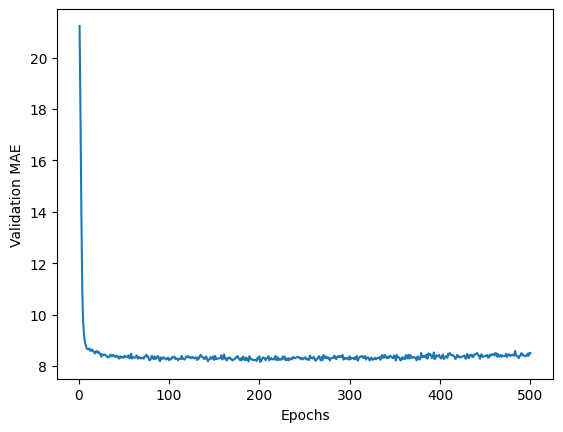

In [97]:
#4-29 검증 점수 그래포 그리기
plt.plot(range(1, len(average_mae_history) +1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

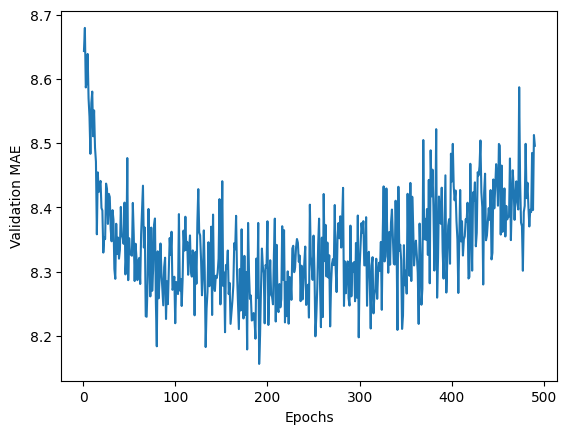

In [99]:
#4-30 처음 10개의 데이터포인트를 제외한 검증점수 그래프 그리기
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history)+1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

In [102]:
#4-31 최종 모델 훈련하기
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11.0915 - mae: 2.3746


In [104]:
predictions= model.predict(test_data)
predictions[0]

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


array([8.849462], dtype=float32)